<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/YB_1121_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [ ]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# 정확도 결과
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9492

# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [ ]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [ ]:
# PCA 적용 95% : n_components=0.95
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# PCA 이후 랜덤포레스트 훈련
forest_clf_pca = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
X_test_pca = pca.transform(X_test)
print(forest_clf_pca.score(X_test_pca, y_test))


0.8925


**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [ ]:
x_scaled = StandardScaler().fit_transform(X)


(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [ ]:
pca = PCA(n_components=2, random_state=1234)
pca.fit(x_scaled)

PCA(n_components=2, random_state=1234)

(5) 추출한 피처를 그래프로 나타내라.

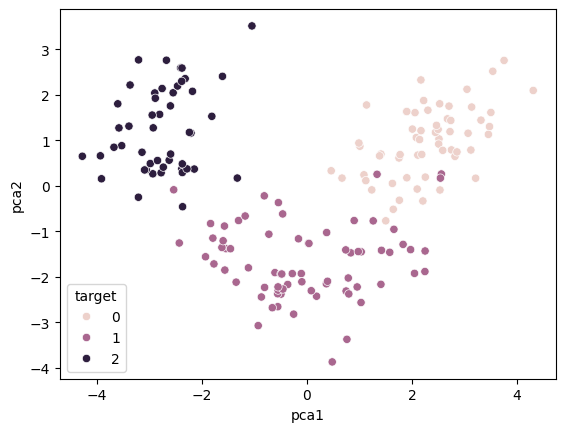

In [ ]:
x_pca = pca.transform(x_scaled)
df = pd.DataFrame(x_pca, columns=['pca1', 'pca2'])
df['target'] = y
sns.scatterplot(data=df, x='pca1', y='pca2', hue='target')
plt.show()

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [ ]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# LDA 적용 : n_components=5
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)


In [ ]:
# LDA 이후 랜덤포레스트 훈련
forest_clf_lda = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf_lda.fit(X_train_lda, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
X_test_lda = lda.transform(X_test)
accuracy_score(y_test, forest_clf_lda.predict(X_test_lda))
print(forest_clf_lda.score(X_test_lda, y_test))

0.8301
